<a href="https://colab.research.google.com/github/wrozal/MIW-pjatk/blob/main/MP1/pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MP1: ROCK PAPER SCISSORS**

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Game result checking method



In [ ]:
def check_result(user_pick, ai_pick):
    """Check the result of the game"""
    # draw
    if user_pick == ai_pick:
        print('Draw. \n')
        return 0
    # win
    elif (user_pick == 'Rock' and ai_pick == 'Scissors') or \
            (user_pick == 'Paper' and ai_pick == 'Rock') or \
            (user_pick == 'Scissors' and ai_pick == 'Paper'):
        print('You won: +1 point. \n')
        return 1
    # loss
    elif (user_pick == 'Rock' and ai_pick == 'Paper') or \
            (user_pick == 'Paper' and ai_pick == 'Scissors') or \
            (user_pick == 'Scissors' and ai_pick == 'Rock'):
        print('You lost: -1 point. \n')
        return -1

## Transition matrix learning method

In [ ]:
def learn(last_index, index):
    if index == 0 and (transition_matrix[last_index][0] - learning_rate / 2 >= 0 and
                       transition_matrix[last_index][2] - learning_rate / 2 >= 0 and
                       transition_matrix[last_index][1] + learning_rate <= 100):
        transition_matrix[last_index][0] -= learning_rate / 2
        transition_matrix[last_index][1] += learning_rate
        transition_matrix[last_index][2] -= learning_rate / 2
    elif index == 1 and (transition_matrix[last_index][0] - learning_rate / 2 >= 0 and
                         transition_matrix[last_index][1] - learning_rate / 2 >= 0 and
                         transition_matrix[last_index][2] + learning_rate <= 100):
        transition_matrix[last_index][0] -= learning_rate / 2
        transition_matrix[last_index][1] -= learning_rate / 2
        transition_matrix[last_index][2] += learning_rate
    elif index == 2 and (transition_matrix[last_index][1] - learning_rate / 2 >= 0 and
                         transition_matrix[last_index][2] - learning_rate / 2 >= 0 and
                         transition_matrix[last_index][0] + learning_rate <= 100):
        transition_matrix[last_index][0] += learning_rate
        transition_matrix[last_index][1] -= learning_rate / 2
        transition_matrix[last_index][2] -= learning_rate / 2

## Index retrieval method

In [ ]:
def get_index(index):
    if index == 'Rock': return 0
    elif index == 'Paper': return 1
    elif index == "Scissors": return 2

## Graph printing method

In [ ]:
def print_graph():
    plt.plot(all_points, color='green', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='red', markersize=12)
    plt.title('Graph showing points from each round')
    plt.xlabel('Game')
    plt.ylabel('Points')
    plt.xlim(0, len(all_points) - 1)
    plt.show()

## Rock, Paper, Scissors game simulation

Game: Rock, Paper and Scissors!
How many games would you like to play? 
10
You will play 10 games. 

Game number: 1
Your pick: Rock
AI pick: Rock
Draw. 

Game number: 2
Your pick: Rock
AI pick: Rock
Draw. 

Game number: 3
Your pick: Rock
AI pick: Scissors
You won: +1 point. 

Game number: 4
Your pick: Rock
AI pick: Rock
Draw. 

Game number: 5
Your pick: Rock
AI pick: Rock
Draw. 

Game number: 6
Your pick: Rock
AI pick: Paper
You lost: -1 point. 

Game number: 7
Your pick: Rock
AI pick: Paper
You lost: -1 point. 

Game number: 8
Your pick: Rock
AI pick: Paper
You lost: -1 point. 

Game number: 9
Your pick: Rock
AI pick: Scissors
You won: +1 point. 

Game number: 10
Your pick: Rock
AI pick: Paper
You lost: -1 point. 



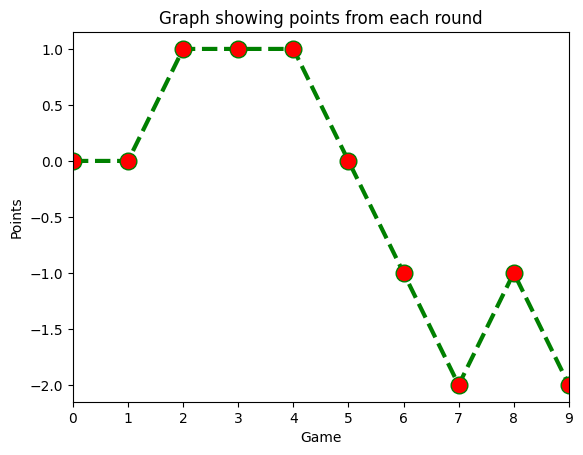

In [ ]:
states = ['Rock', 'Paper', 'Scissors']
transition_matrix = [[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]]

print('Game: Rock, Paper and Scissors!')
number_of_games = int(input('How many games would you like to play? \n'))
print(f'You will play {number_of_games} games. \n')

all_points = [0] * number_of_games
learning_rate = 0.05
last_user_pick = ''


for i in range(number_of_games):
    print(f'Game number: {i + 1}')
    if i == 0:
        last_user_pick = input('Your pick: ')
        ai_pick = np.random.choice(states, p=transition_matrix[0])
        print(f'AI pick: {ai_pick}')
        all_points[i] = check_result(last_user_pick, ai_pick)
    else:
        user_pick = input('Your pick: ')
        index_of_last_user_pick = get_index(last_user_pick)
        index_of_user_pick = get_index(user_pick)
        ai_pick = np.random.choice(states, p=transition_matrix[index_of_last_user_pick])
        learn(index_of_last_user_pick, index_of_user_pick)
        # print('Rock prob: ', probabilities[0])
        # print('Paper prob: ', probabilities[1])
        # print('Scissors prob: ', probabilities[2])
        print(f'AI pick: {ai_pick}')
        all_points[i] = all_points[i - 1] + check_result(user_pick, ai_pick)
        last_user_pick = user_pick

print_graph()